In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [275]:
df = pd.read_csv('sample_dataset.csv')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


**Features**

**Customer ID :** The unique identifier for each customer.

**Name :** The customer's name.

**Surname :** The customer's last name.

**Gender :** The gender of the customer.

**Birthdate :** The customer's date of birth.

**Transaction Amount :** The amount of the transaction. ($)

**Date :** The date of the transaction.

**Merchant Name :** The name of the merchant where the transaction was made.

**Category :** The category of the transaction.

In [277]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


In [278]:
df.drop(columns = ['Customer ID', 'Name', 'Surname'], inplace = True)

In [279]:
df['Merchant Name'].value_counts()

Smith Ltd                     69
Smith Group                   65
Smith PLC                     65
Smith Inc                     60
Smith LLC                     60
                              ..
Lam, May and Lucas             1
Chan-Johnson                   1
Yang-Rodgers                   1
Richmond, Watson and Smith     1
Combs LLC                      1
Name: Merchant Name, Length: 36939, dtype: int64

In [280]:
df['Category'].unique()

array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
       'Market'], dtype=object)

In [281]:
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format = ('%Y-%m-%d'))
df['Date'] = pd.to_datetime(df['Date'], format = ('%Y-%m-%d'))
df['Category'] = df['Category'].astype('category')
df['Gender'] = df['Gender'].astype('category')

## Cleaning Data 

In [282]:
df.isna().sum()

Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='Density'>

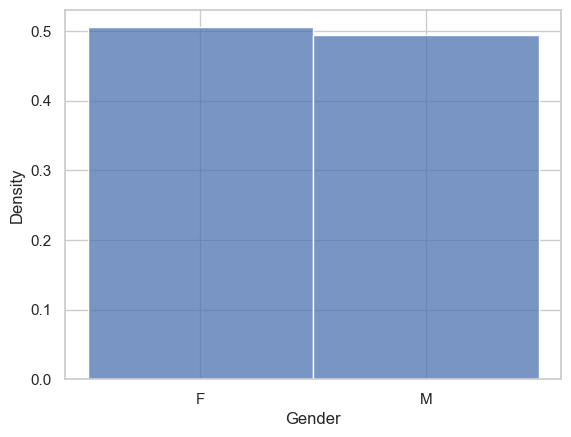

In [283]:
sns.histplot(df, x = 'Gender', stat = 'density')

#### Since the W & M are equal, I replace the Nan with equal amount of F & M

In [284]:
# replace the missing value with equal Male and Female
import random
m = df.Gender.isna()
df.loc[m, 'Gender'] = random.choices(['F', 'M'], weights = [1,1], k = m.sum())

#### Check is it any duplicated in the data set?

In [285]:
df.duplicated().sum()

0

## EDA

1. Different gender tend to go to which type of merchant?
2. The average amount of money customers spent in each type of merchant ?
3. Different ages of people tend to go to which merchant ?
4. Is there special Month or Date that people spent more money on some types of merchant ?

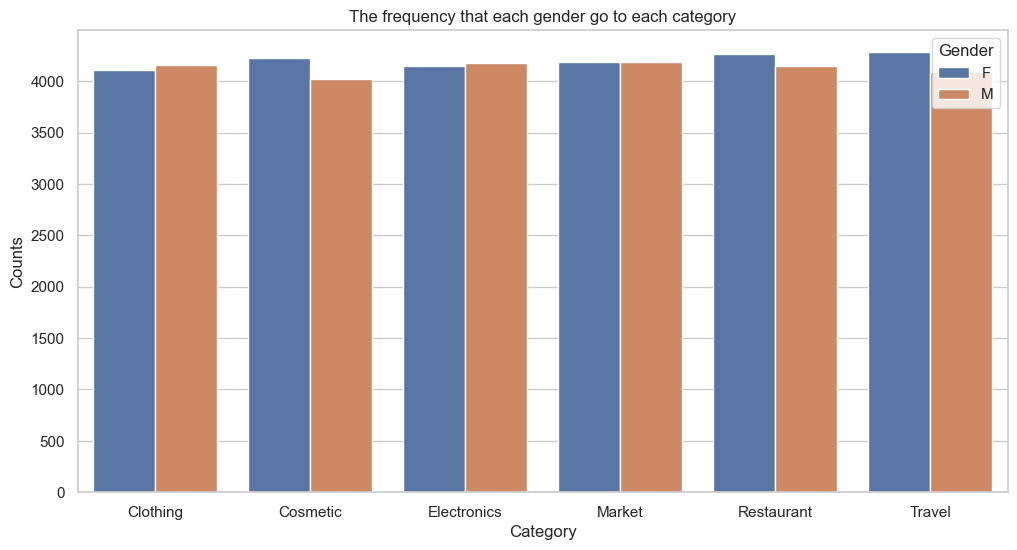

In [309]:
# 1 Different gender tend to go to which type of merchant?
df2 = df[['Gender', 'Category', 'Transaction Amount']]\
    .groupby(['Category', 'Gender']).count()\
    .reset_index()\
    .rename(columns = {'Transaction Amount': 'Counts'})
plt.figure(figsize = (12,6))
sns.barplot(df2, x = 'Category', y = 'Counts', hue = 'Gender')
plt.title('The frequency that each gender go to each category')
plt.show()

#### Seem like M & W go to merchant almost equaly
#### only Cosmetic have a little more Female

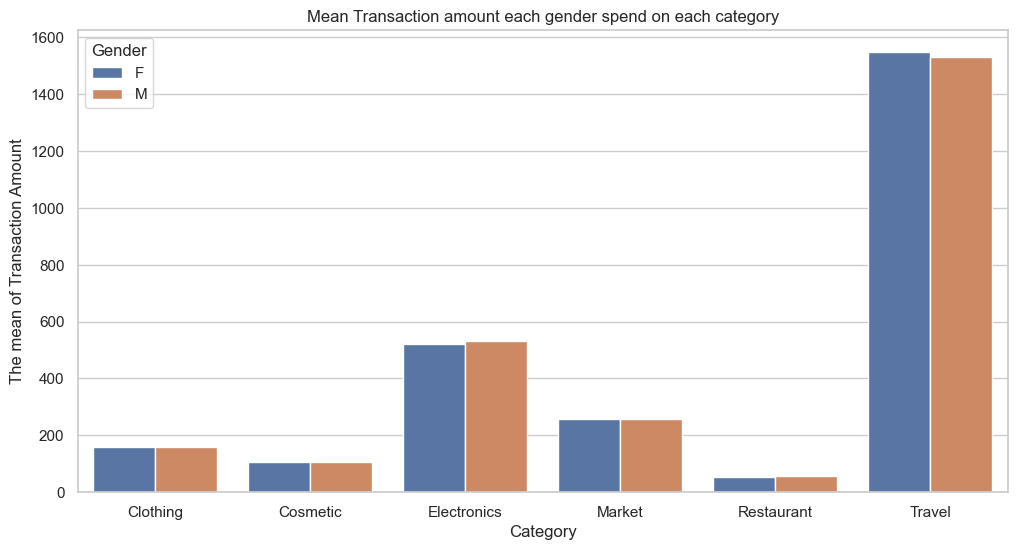

In [308]:
# 2 The average amount of money customers spent in each type of merchant ?
df3 = df[['Gender', 'Category', 'Transaction Amount']]\
    .groupby(['Category', 'Gender']).mean()\
    .reset_index()
plt.figure(figsize = (12,6))
plot = sns.barplot(df3, x = 'Category', y = 'Transaction Amount', hue = 'Gender')
plt.title('Mean Transaction amount each gender spend on each category')
plt.ylabel('The mean of Transaction Amount')
plt.show()

#### 1. Travel is the highest category customers spent, then is Electronics
#### 2. The money M & W spent almost equal in each category

In [290]:
# 3 Different ages of people tend to go to which type of merchant ?
df['Year'] = df['Birthdate'].dt.year
df['Month'] = df['Birthdate'].dt.month

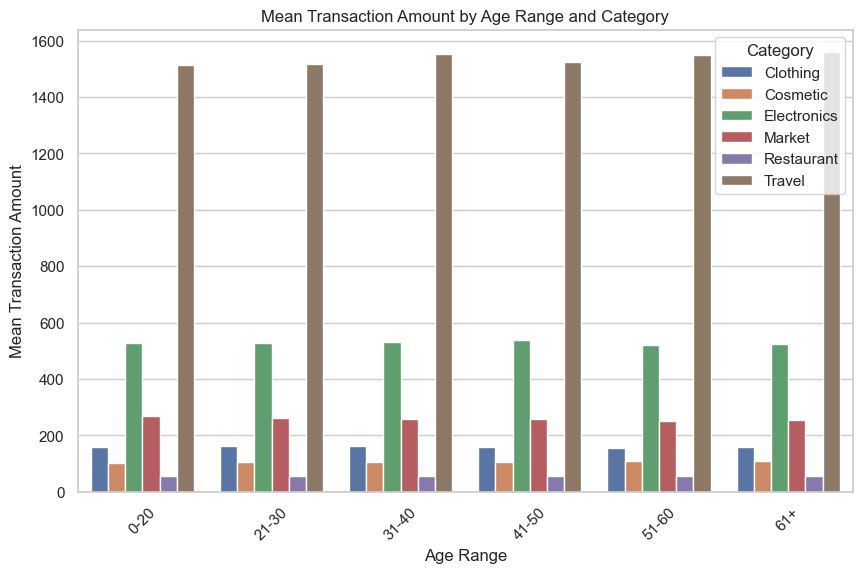

In [291]:
# Calculate the age for each customer based on 'Birthdate'
current_year = pd.to_datetime('now').year
df['Age'] = current_year - df['Birthdate'].dt.year
# Define age ranges
age_bins = [0, 20, 30, 40, 50, 60, 100]  # Customize age ranges as needed
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the customers into age ranges
df['Age Range'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

# Group the data by 'Age Range' and 'Category' and calculate the mean of 'Transaction Amount'
grouped_data = df.groupby(['Age Range', 'Category'])['Transaction Amount'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.barplot(x='Age Range', y='Transaction Amount', hue='Category', data=grouped_data)
plt.title('Mean Transaction Amount by Age Range and Category')
plt.xlabel('Age Range')
plt.ylabel('Mean Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Seem like every age people spent on Travel most

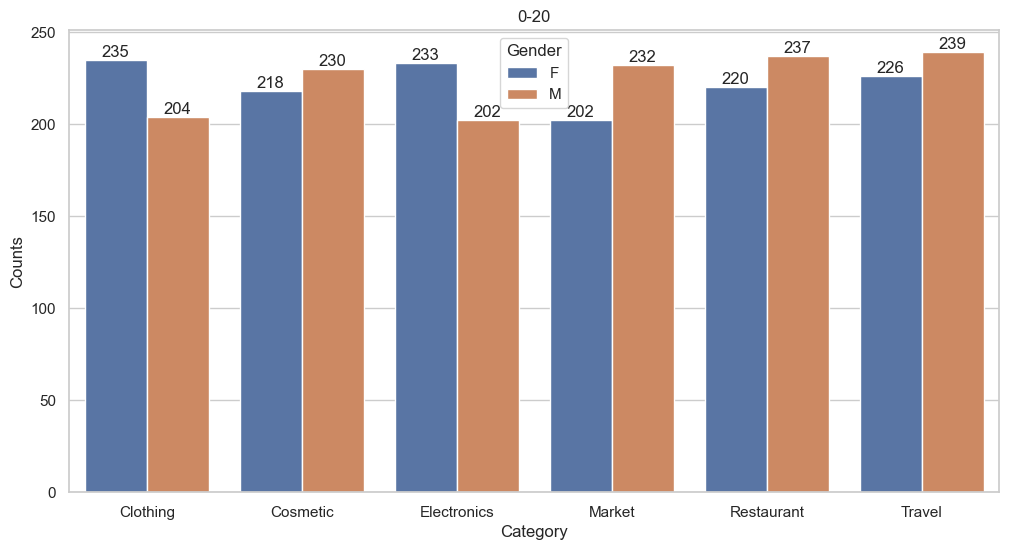

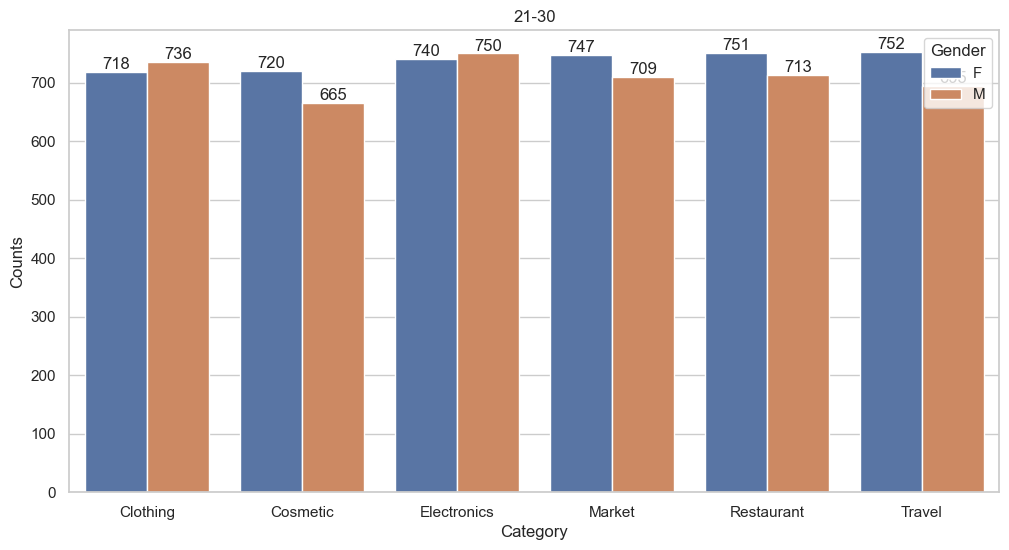

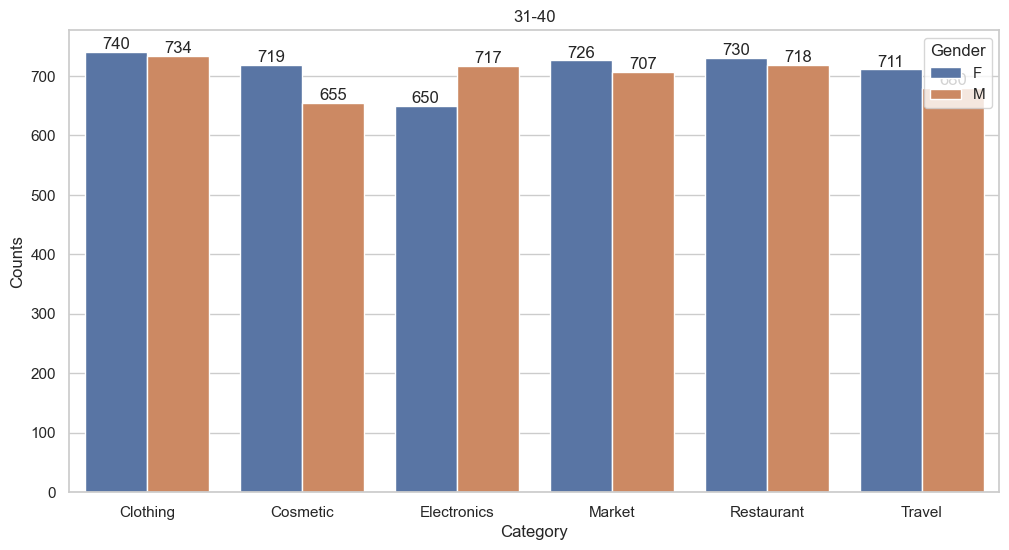

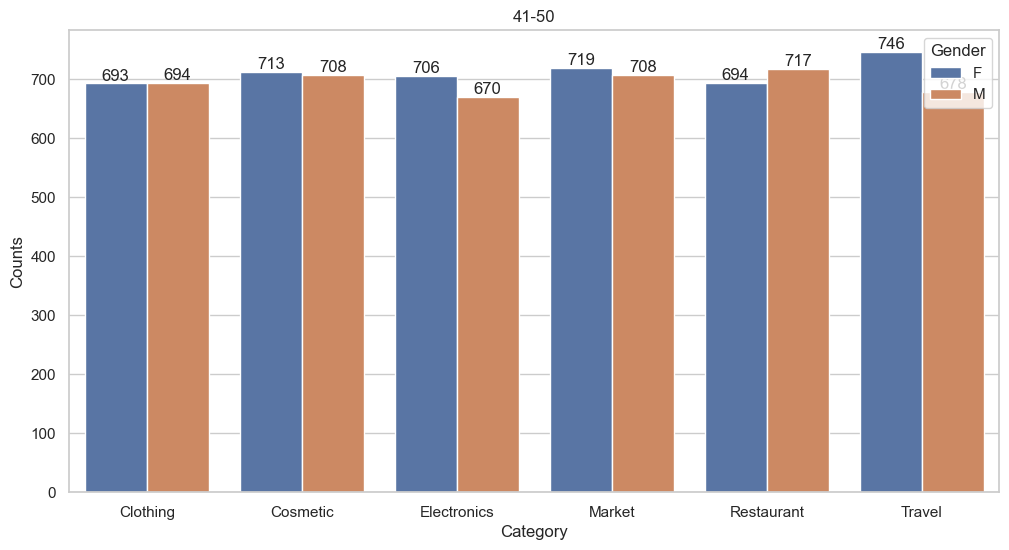

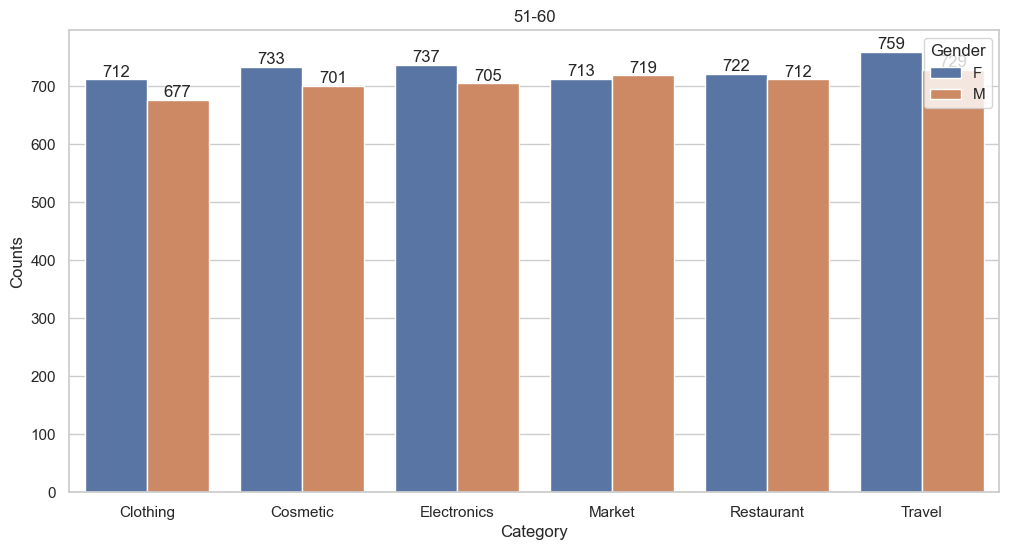

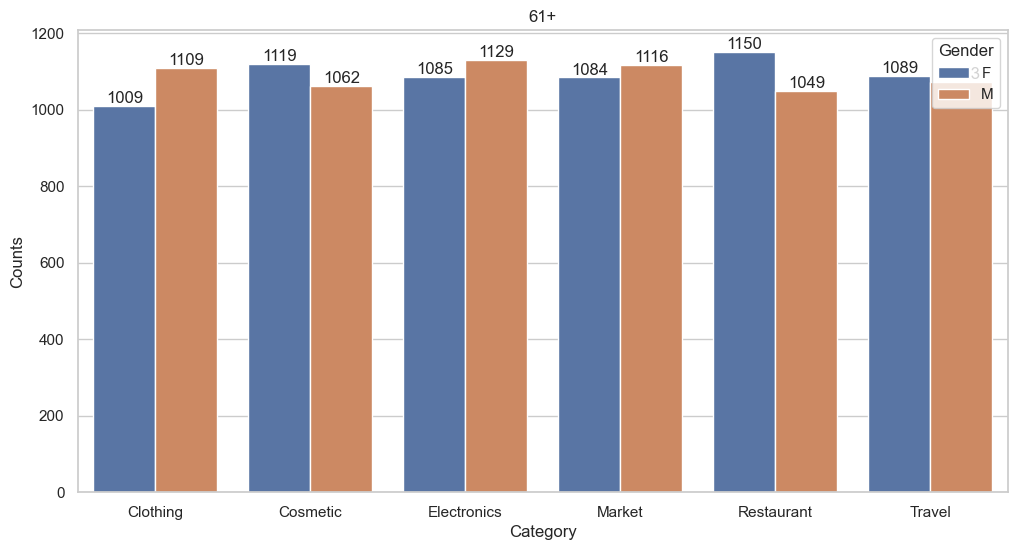

In [292]:
grouped_data2 = df.groupby(['Age Range', 'Category', 'Gender'])['Transaction Amount'].count().reset_index()
for i in age_labels:
    plt.figure(figsize = (12,6))
    sns.set(style="whitegrid")
    dd = grouped_data2[grouped_data2['Age Range'] == i]
    ax = sns.barplot(data = dd, x = 'Category', y = 'Transaction Amount', hue = 'Gender')
    plt.title(i)
    plt.xlabel('Category')
    plt.ylabel('Counts')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

#### **0-20** Female go to *Clothing* , *Electronics* more than male
#### Male go to *Market* more than Female
#### **21-30** Female go to *Travel*, *Restaurant* more than Male
#### Male go to *Clothing* more than Female
#### **31-40** Female go to *Cosmetic*, *Travel* more than Male
#### Male go to *Electronics* more than Female
#### **41-50** Female go to *Electronics*, *Travel* more than Male
#### **51-60** Female go to *Travel*, *Clothing* more than Male
#### **61+** Male go to *Clothing*, *Electronics*, *Market* more than Female
#### Female go to *Cosmetic*, *Restaurant* more than Male

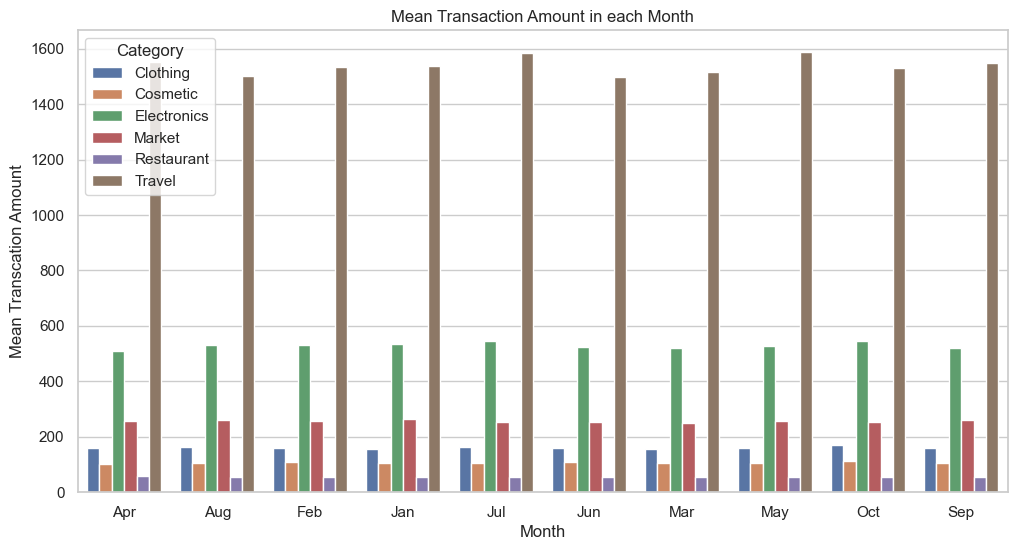

In [298]:
# 4.Is there special Month or Date that people spent more money on some types of merchant ?
df['Str Month'] = df['Date'].dt.strftime('%b')

grouped_data3 = df.groupby(['Str Month', 'Category'])['Transaction Amount']\
.mean().reset_index()
plt.figure(figsize = (12,6))
plot = sns.barplot(data = grouped_data3, x = 'Str Month', y = 'Transaction Amount', hue = 'Category')
plt.title('Mean Transaction Amount in each Month')
plt.xlabel('Month')
plt.ylabel('Mean Transcation Amount')
plt.show()

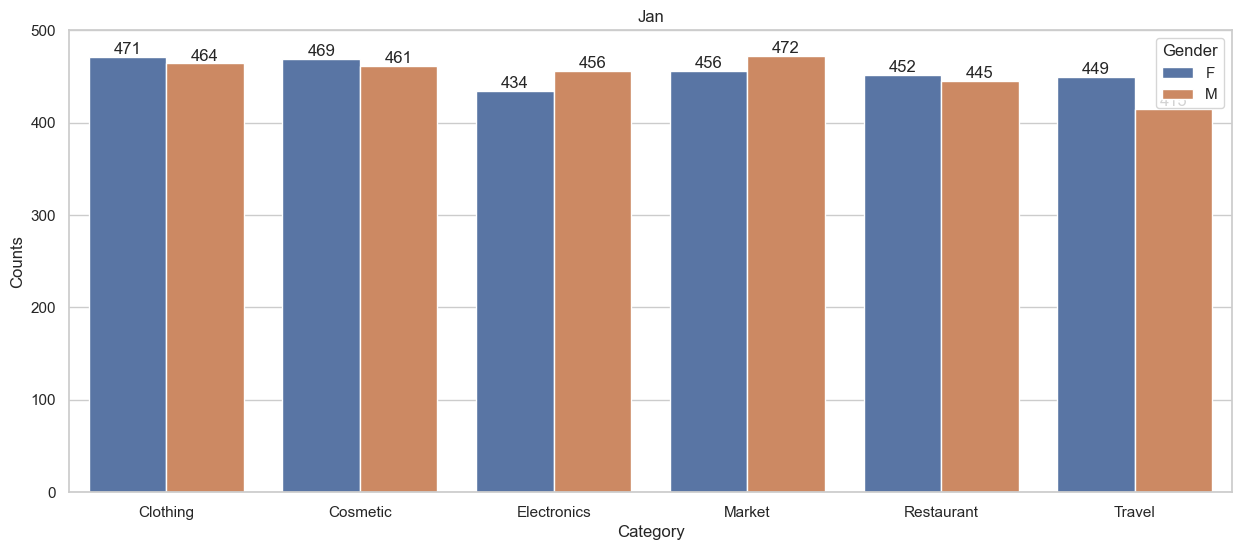

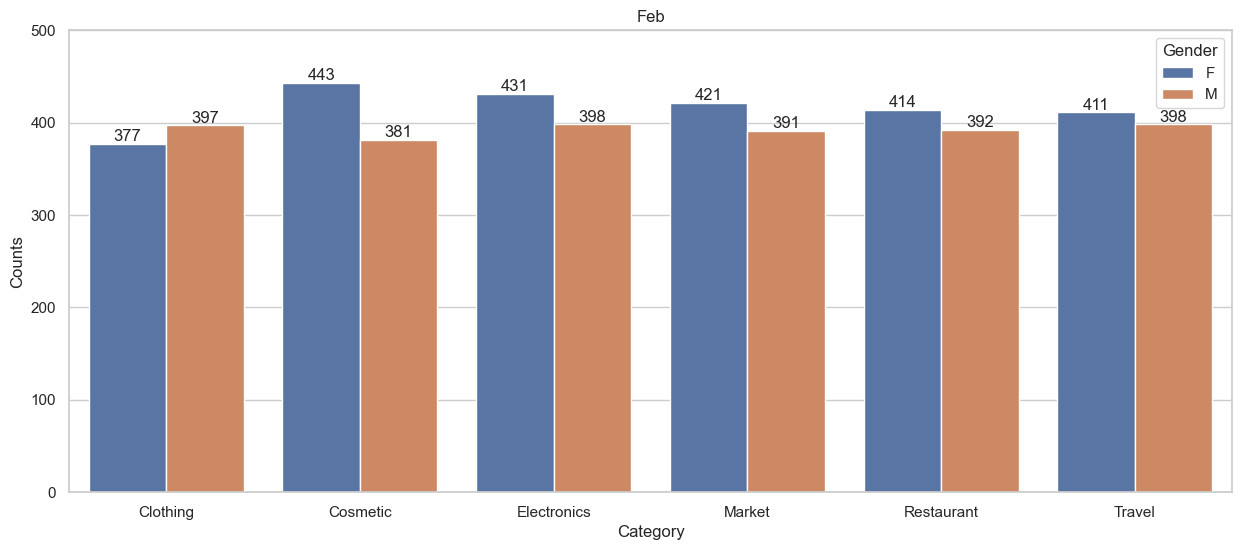

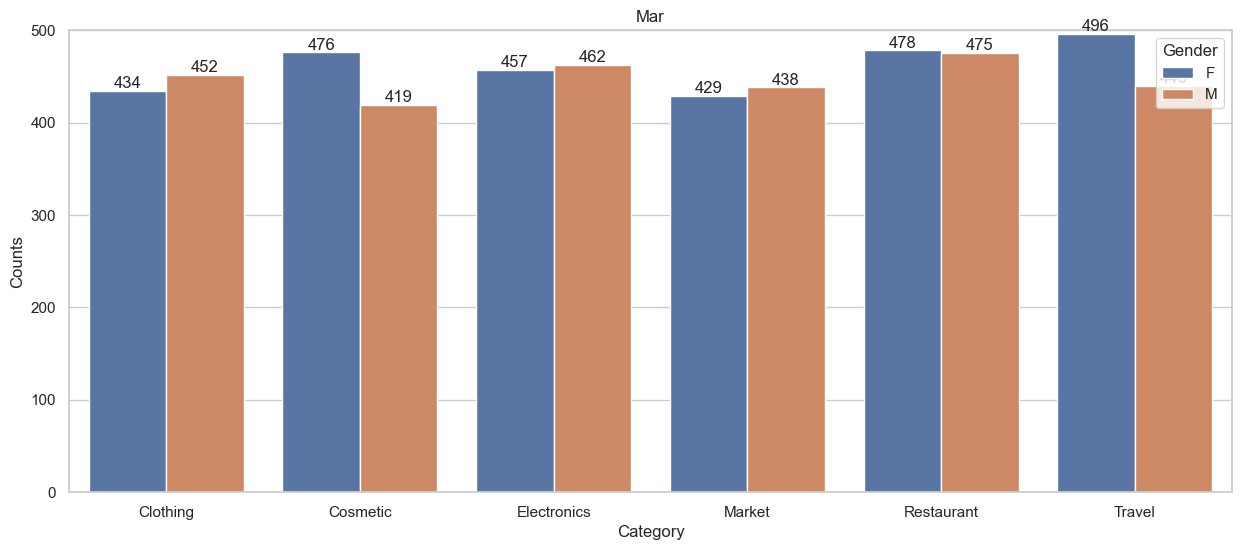

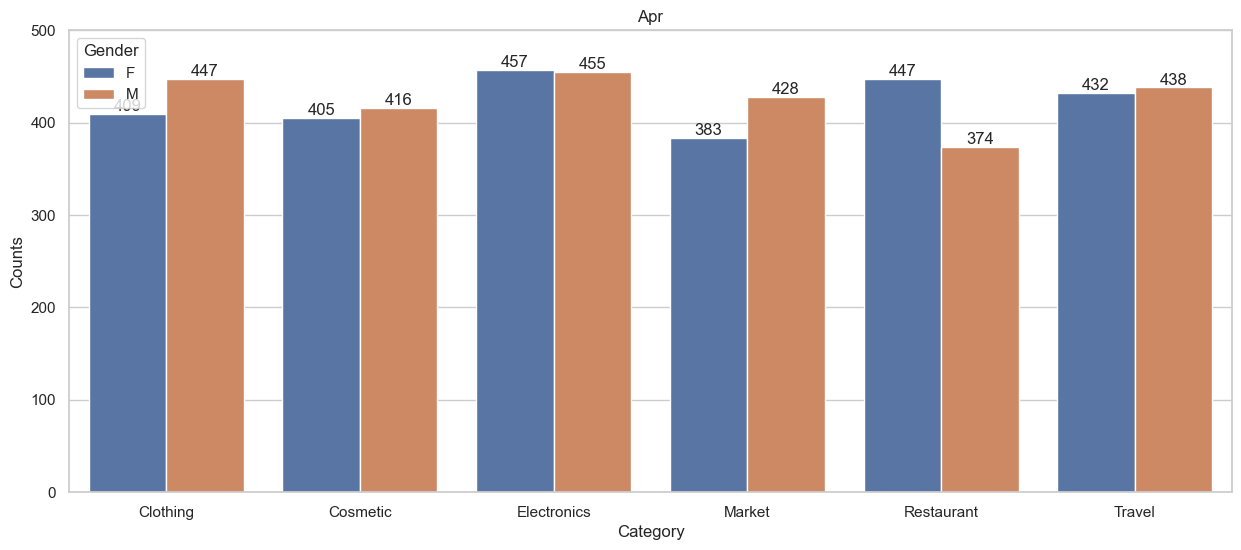

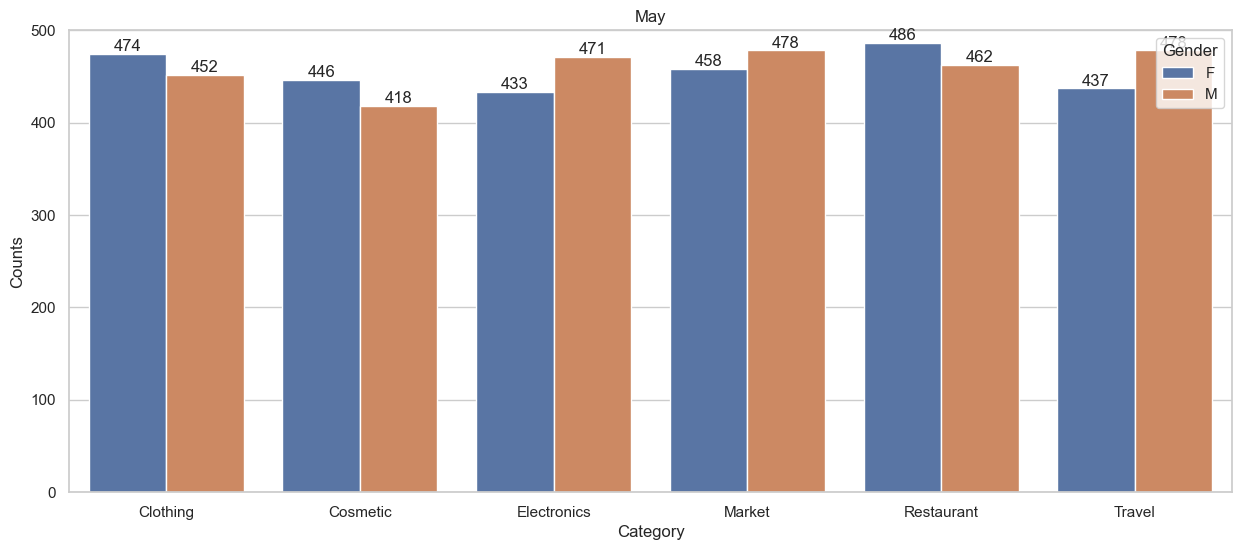

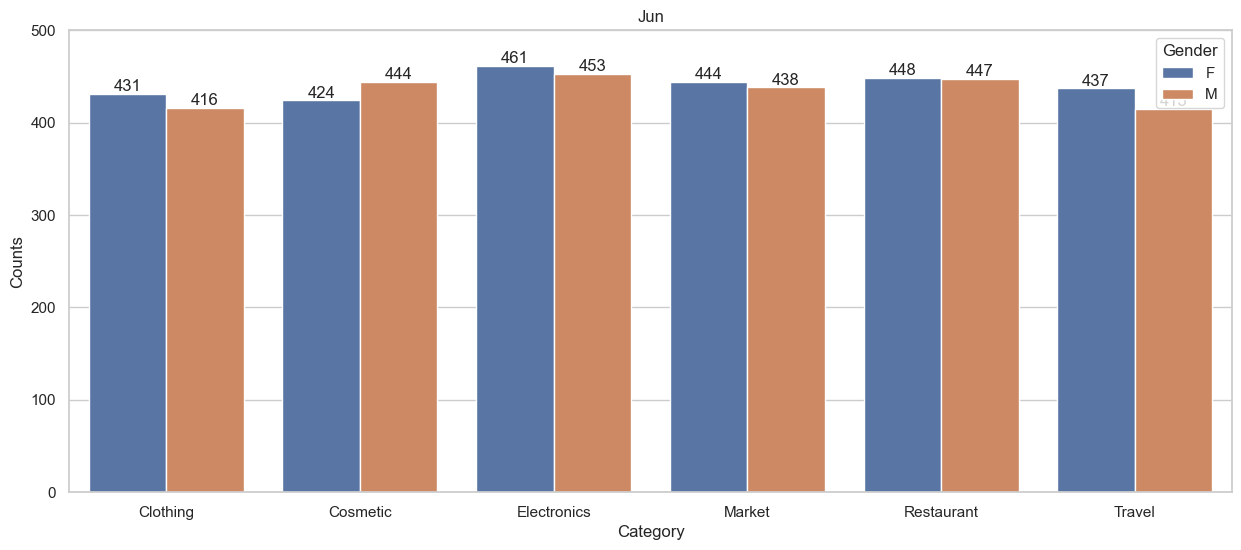

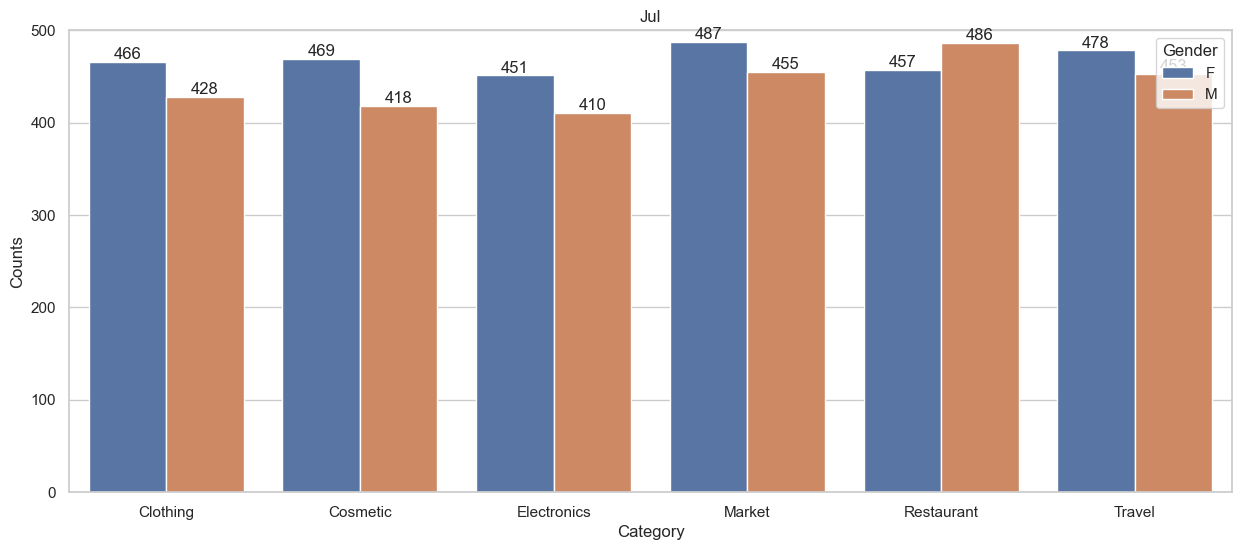

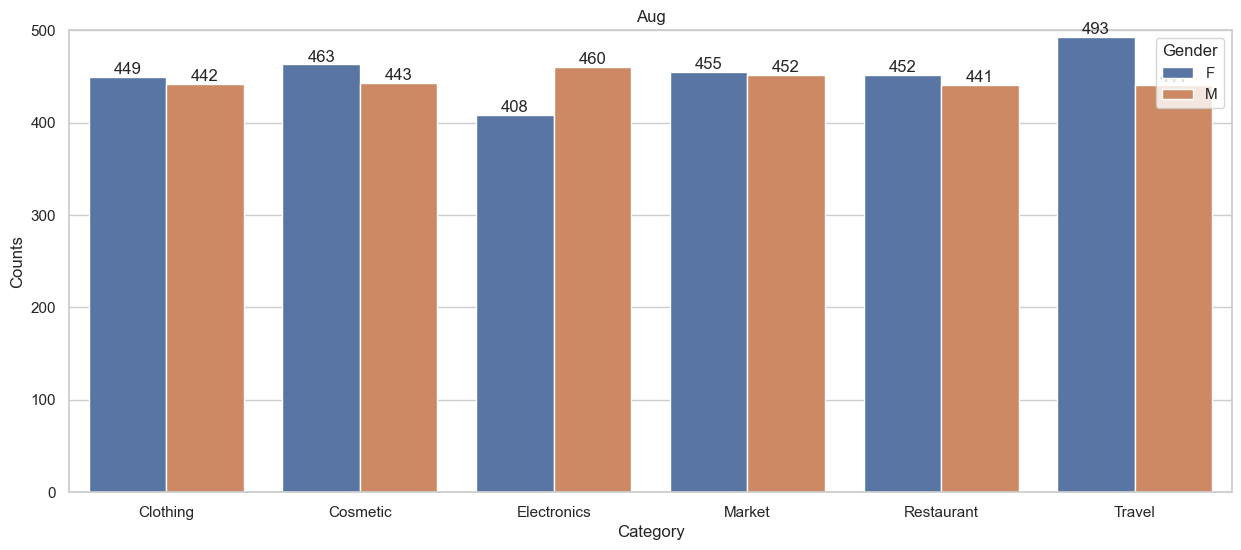

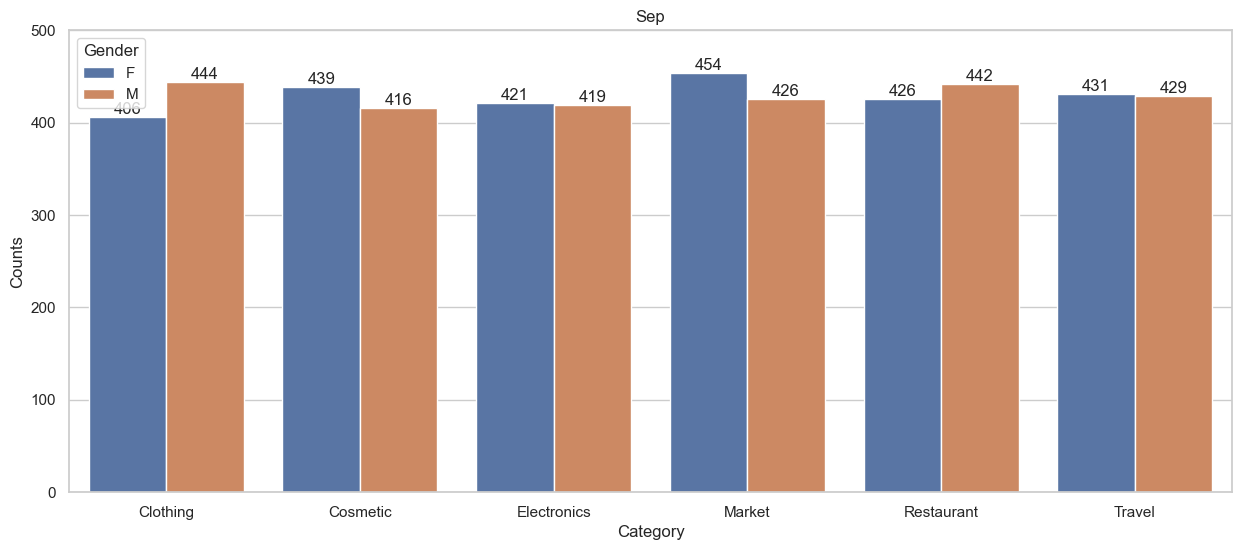

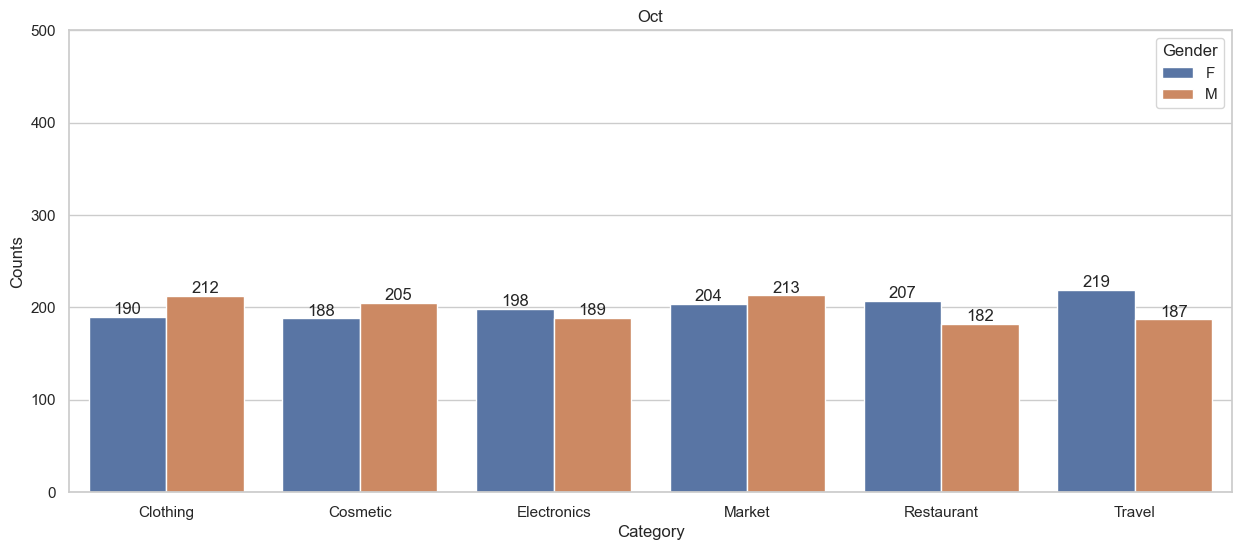

In [296]:
grouped_data4 = df.groupby(['Str Month', 'Category', 'Gender'])['Transaction Amount']\
.count().reset_index()

custom_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Month = sorted(df['Str Month'].unique(), key=lambda x: custom_month_order.index(x))

for i in Month:
    plt.figure(figsize = (15,6))
    sns.set(style = "whitegrid")
    dd = grouped_data4[grouped_data4['Str Month'] == i]
    ax = sns.barplot(data = dd, x = 'Category', y = 'Transaction Amount', hue = 'Gender')
    plt.ylim(0, 500) 
    plt.title(i)
    plt.xlabel('Category')
    plt.ylabel('Counts')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

#### **Jan** Female go to **Travel** more than Male
#### **Feb** Female go to **Cosmetic**, **Electronic** more than Male 
#### **Mar** Female go to **Cosmetic**, **Travel** more than Male
#### **Apr**  Female go to **Restaurant** more than Male,
#### Male go to **Market** more than Female
#### **May** Female go to *Cosmetic** more than Male, 
#### Male go to **Electronic**, **Travel**, **Market** more than Female
#### **Jun** Male go to **Cosmetic** more than Female
#### **Jul** Female go to **Cosmetic**, **Electronics**, **Market** more than Male
#### **Aug** Female go to **Travel** more than Male,
#### Male go to **Electronics** more than Female
#### **Sep** Male go to **Clothing** more than Female
#### **Oct** Female go to **Travel** more than Male,
#### Male go to **Clothing** more than Female 
#### Seem like people buy less in October 